<a href="https://colab.research.google.com/github/AIInspire/Linear_Algebra/blob/main/Trainees_from_Vector_Space_to_Gram_Shmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Combination
### Use NumPy

$$v_1=\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix},
v_2=\begin{bmatrix} 3 \\ 5 \\ 1 \end{bmatrix},
v_3=\begin{bmatrix} 0 \\ 0 \\ 8 \end{bmatrix}$$
- Find <b>b</b> vector where $$b=3v_1+0v_2+0v_3$$
- Find <b>x</b> vector where $$x=-v_1+v_2-0.5v_3$$

In [ ]:
import numpy as np

v1 = np.array([[1], [2], [3]])
v2 = np.array([[3], [5], [1]])
v3 = np.array([[0], [0], [8]])

b = 3 * v1 + 0 * v2 + 0 * v3

x = -v1 + v2 - 0.5 * v3

# Print the results
print("b vector:\n", b)
print("x vector:\n", x)

b vector:
 [[3]
 [6]
 [9]]
x vector:
 [[ 2.]
 [ 3.]
 [-6.]]


b:
[[3]
 [6]
 [9]]

x:
[[ 2.]
 [ 3.]
 [-6.]]


## Vector Span
### Use Numpy (matrix inverse) and SymPy (rref)

#### Is $$v=\begin{bmatrix} 19 \\ 10 \\ -1 \end{bmatrix}$$ in the span of
$$v_1=\begin{bmatrix} 3 \\ -1 \\ 2 \end{bmatrix},
v_2=\begin{bmatrix} -5 \\ 0 \\ 1 \end{bmatrix},
v_3=\begin{bmatrix} 1 \\ 7 \\ -4 \end{bmatrix}$$

In [ ]:
import numpy as np
from sympy import Matrix

# Using Numpy to check if v is in the span
v = np.array([19, 10, -1])
v1 = np.array([3, -1, 2])
v2 = np.array([-5, 0, 1])
v3 = np.array([1, 7, -4])

A = np.column_stack((v1, v2, v3))

if np.linalg.det(A) != 0:
  c = np.linalg.inv(A).dot(v)
  print("Vector v is in the span of v1, v2, v3.")
  print("Coefficients :", c)
else:
  print("Using Numpy:")
  print("Matrix A is not invertible")

Vector v is in the span of v1, v2, v3.
Coefficients : [ 4. -1.  2.]


In [ ]:
# Using SymPy to compute RREF
A_sympy = Matrix([v1, v2, v3]).T
augmented_matrix = A_sympy.row_join(Matrix(v))
rref_matrix, pivot_columns = augmented_matrix.rref()

print("RREF of the augmented matrix:")
print(rref_matrix)
print(pivot_columns)

RREF of the augmented matrix:
Matrix([[1, 0, 0, 4], [0, 1, 0, -1], [0, 0, 1, 2]])
(0, 1, 2)


(Matrix([
 [1, 0, 0,  4],
 [0, 1, 0, -1],
 [0, 0, 1,  2]]),
 (0, 1, 2))

[[ 4.]
 [-1.]
 [ 2.]]


## Vector Linear Independence
### Use rref and determinant
- Consider the following sets of vectors in R3. If the set is independent, prove it.
- If the set is dependent, find a nontrivial linear combination of the vectors which is equal to 0.
    - {(2, 0, -3), (1, 1, 1), (1, 7, 2)}.
    - {(1, 2, -1), (4, 1, 3), (-10, 1, -11)}.

<b>Hint: we have to determine whether this implies that 𝒂=𝒃=𝒄=𝟎.</b>

In [ ]:
import numpy as np
import sympy as sm
from sympy import Matrix, det

# Set 1:
vectors_set1 = Matrix([[2, 1, 1], [0, 1, 7], [-3, 1, 2]])
det_set1 = det(vectors_set1)

print("Set 1 Determinant:", det_set1)
if det_set1 != 0:
  print("Set 1 is linearly independent")
else:
  print("Set 1 is linearly dependent")

rref_set1, pivot_columns_set1 = vectors_set1.rref()

print("\nSet 1 RREF:")
print(rref_set1)
print(pivot_columns_set1)

Set 1 Determinant: -28
Set 1 is linearly independent

Set 1 RREF:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
(0, 1, 2)


(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]),
 (0, 1, 2))

In [ ]:
# Set 2:
vectors_set2 = Matrix([[1, 4, -10], [2, 1, 1], [-1, 3, -11]])
det_set2 = det(vectors_set2)

print("\nSet 2 Determinant:", det_set2)
if det_set2 != 0:
  print("Set 2 is linearly independent.")
else:
  print("Set 2 is linearly dependent.")

rref_set2, pivot_columns_set2 = vectors_set2.rref()

print("\nSet 2 RREF:")
print(rref_set2)
print(pivot_columns_set2)


Set 2 Determinant: 0
Set 2 is linearly dependent.

Set 2 RREF:
Matrix([[1, 0, 2], [0, 1, -3], [0, 0, 0]])
(0, 1)


(Matrix([
 [1, 0,  2],
 [0, 1, -3],
 [0, 0,  0]]),
 (0, 1))

## Linear Transformation
### Ex.1

$$T=\begin{bmatrix} 1&2 \\ 3&7 \end{bmatrix}$$
- Write the linear transformation expression of this matrix. i.e. Linear functions of x,y.
- Apply the transformation matrix <b>T</b> to the following vectors:
$$\begin{bmatrix} 1 \\ 0 \end{bmatrix},\begin{bmatrix} 0 \\ 1 \end{bmatrix} $$
- Find all points <b>(x,y)</b> such that <b>T(x,y)=(1,0)</b>

In [ ]:
T = np.array([[1, 2], [3, 7]])
v1 = np.array([[1], [0]])
v2 = np.array([[0], [1]])

T_v1 = np.dot(T, v1)
T_v2 = np.dot(T, v2)

print("T.v2= \n", T_v1, "\n")
print("T.v2= \n", T_v2)

T.v2= 
 [[1]
 [3]] 

T.v2= 
 [[2]
 [7]]


A.v1=
[[1]
 [3]]

A.v2=
[[2]
 [7]]


In [ ]:
b = np.array([[1], [0]])
x_and_y = np.linalg.solve(T, b)

print("(x,y): \n", x_and_y)

(x,y): 
 [[ 7.]
 [-3.]]


(x,y):
[[ 7.]
 [-3.]]


### Ex.2
### For the expression $$T\begin{bmatrix} x \\ y \end{bmatrix}=\begin{bmatrix} x+y \\ y \end{bmatrix}$$
- Find the transformation matrix.
- Represent the transformation graphically <b>(on paper)</b>.
- Find all points <b>(x,y)</b> such that <b>T(x,y)=(3,4)</b>

In [ ]:
T = np.array([[1, 1], [0, 1]])
b = np.array([[3], [4]])

x_and_y = np.linalg.solve(T, b)

print("(x, y): \n", x_and_y)

(x, y): 
 [[-1.]
 [ 4.]]


x:
[[-1.]
 [ 4.]]


## Determinant
### Find Determinant of:

$$\begin{bmatrix} 3&8 \\ 4&6 \end{bmatrix} , \begin{bmatrix} 4&6 \\ 3&8 \end{bmatrix}$$
$$\begin{bmatrix} 6&1&1 \\ 4&-2&5 \\ 2&8&7\end{bmatrix}$$
$$\begin{bmatrix} 3&2&0&1 \\ 4&0&1&2 \\ 3&0&2&1 \\ 9&2&3&1\end{bmatrix}$$


In [ ]:
matrix1 = np.array([[3, 8], [4, 6]])
determinant1 = np.linalg.det(matrix1)

print("The determinant of matrix 1: \n", determinant1)

The determinant of matrix 1: 
 -14.000000000000004


In [ ]:
matrix2 = np.array([[4,6],[3,8]])
determinant2 = np.linalg.det(matrix2)

print("The determinant of matrix 2: \n", determinant2)

The determinant of matrix 2: 
 14.000000000000004


In [ ]:
matrix3 = np.array([[6,1,1],[4,-2,5],[2,8,7]])
determinant3 = np.linalg.det(matrix3)

print("The determinant of matrix 3: \n", determinant3)

The determinant of matrix 3: 
 -306.0


In [ ]:
matrix4 = np.array([[3,2,0,1],[4,0,1,2],[3,0,2,1],[9,2,3,1]])
determinant4 = np.linalg.det(matrix4)

print("The determinant of matrix 4: \n", determinant4)

The determinant of matrix 4: 
 24.000000000000004


1.  -14.000000000000004
2.  14.000000000000004
3.  -306.0
4.  24.000000000000004


## Matrix Rank
### Find the rank of the matrix (use rref and confirm using matrix_rank())

$$X = \begin{bmatrix} 1&2&4&4 \\ 3&4&8&0 \end{bmatrix}$$
$$Y = \begin{bmatrix} 1&2&3 \\ 2&3&5 \\ 3&4&7 \\ 4&5&9  \end{bmatrix}$$

In [ ]:
X = np.array([[1, 2, 4, 4],[3,4,8,0]])

sm_matrix = Matrix(X)
rref_matrix, pivots = sm_matrix.rref()

print("RREF of Matrix X: \n", rref_matrix)
print(pivots, "\n")

rank_rref = len(pivots)
rank_matrix = np.linalg.matrix_rank(X)

print("X Rank: ", rank_matrix)

RREF of Matrix X: 
 Matrix([[1, 0, 0, -8], [0, 1, 2, 6]])
(0, 1) 

X Rank:  2


(Matrix([
[1, 0, 0, -8],
[0, 1, 2,  6]]), (0, 1))

X rank: 2


In [ ]:
Y = np.array([[1,2,3],[2,3,5],[3,4,7],[4,5,9]])

sm_matrix = Matrix(Y)
rref_matrix, pivots = sm_matrix.rref()

print("RREF of Matrix Y: \n", rref_matrix)
print(pivots, "\n")

rank_rref = len(pivots)
rank_matrix = np.linalg.matrix_rank(Y)

print("Y Rank: ", rank_matrix)

RREF of Matrix Y: 
 Matrix([[1, 0, 1], [0, 1, 1], [0, 0, 0], [0, 0, 0]])
(0, 1) 

Y Rank:  2


(Matrix([
[1, 0, 1],
[0, 1, 1],
[0, 0, 0],
[0, 0, 0]]), (0, 1))

Y rank: 2


## Matrix Inverse
### Find the inverse:

$$\begin{bmatrix} 3&8 \\ 4&6 \end{bmatrix} , \begin{bmatrix} 4&6 \\ 3&8 \end{bmatrix}$$
$$\begin{bmatrix} 6&1&1 \\ 4&-2&5 \\ 2&8&7\end{bmatrix}$$
$$\begin{bmatrix} 3&2&0&1 \\ 4&0&1&2 \\ 3&0&2&1 \\ 9&2&3&1\end{bmatrix}$$

In [ ]:
matrix1 = np.array([[3, 8], [4, 6]])
matrix2 = np.array([[4, 6], [3, 8]])
matrix3 = np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]])
matrix4 = np.array([[3, 2, 0, 1], [4, 0, 1, 2], [3, 0, 2, 1], [9, 2, 3, 1]])

determinant1 = np.linalg.det(matrix1)
determinant2 = np.linalg.det(matrix2)
determinant3 = np.linalg.det(matrix3)
determinant4 = np.linalg.det(matrix4)

if determinant1 != 0:
  matrix_inverse = np.linalg.inv(matrix1)
  print("1. \n", matrix_inverse)
else:
  print("Invertible Matrix")

if determinant2 != 0:
  matrix_inverse = np.linalg.inv(matrix2)
  print("2. \n", matrix_inverse)
else:
  print("Invertible Matrix")

if determinant3 != 0:
  matrix_inverse = np.linalg.inv(matrix3)
  print("3. \n", matrix_inverse)
else:
  print("Invertible Matrix")

if determinant4 != 0:
  matrix_inverse = np.linalg.inv(matrix4)
  print("4. \n", matrix_inverse)
else:
  print("Invertible Matrix")

1. 
 [[-0.42857143  0.57142857]
 [ 0.28571429 -0.21428571]]
2. 
 [[ 0.57142857 -0.42857143]
 [-0.21428571  0.28571429]]
3. 
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]
4. 
 [[-0.25        0.25       -0.5         0.25      ]
 [ 0.66666667 -0.5         0.5        -0.16666667]
 [ 0.16666667 -0.5         1.         -0.16666667]
 [ 0.41666667  0.25        0.5        -0.41666667]]


1.
 [[-0.42857143  0.57142857]
 [ 0.28571429 -0.21428571]]

2.
 [[ 0.57142857 -0.42857143]
 [-0.21428571  0.28571429]]

3.
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]

4.
 [[-0.25        0.25       -0.5         0.25      ]
 [ 0.66666667 -0.5         0.5        -0.16666667]
 [ 0.16666667 -0.5         1.         -0.16666667]
 [ 0.41666667  0.25        0.5        -0.41666667]]


## Changing Basis (Orthogonal Coordinates)
### Perform the following (Once by dot product and another by matix).
### First confirm b1 and b2 are orthogonal basis.

### 1) Transform $v=\begin{bmatrix}5 \\ -1\end{bmatrix}$ from the stadard basis to b1 and b2 basis. $b_1=\begin{bmatrix}1 \\ 1\end{bmatrix}$ , $b_2=\begin{bmatrix}1\\-1\end{bmatrix}$
### 2) Transform $v=\begin{bmatrix}10\\-5\end{bmatrix}$ from the stadard basis to b1 and b2 basis. $b_1=\begin{bmatrix}3\\ 4\end{bmatrix}$ , $b_2=\begin{bmatrix} 4 \\-3 \end{bmatrix}$

In [ ]:
# Ex. 1
v = np.array([5,-1])

b1 = np.array([1, 1])
b2 = np.array([1, -1])

In [ ]:
#Ex. 1 Using dot product (dp)

dot_product = np.dot(b1.T, b2)

if dot_product == 0:
  print("b1 and b2 are orthogonal.\n")
else:
  print("b1 and b2 are not orthogonal.\n")

vb_dp = np.array([[np.dot(v.T, b1) / np.dot(b1.T, b1)],
                     [np.dot(v.T, b2) / np.dot(b2.T, b2)]])

print("Using dot product \nvb: \n", vb_dp)

b1 and b2 are orthogonal.

Using dot product 
vb: 
 [[2.]
 [3.]]


In [ ]:
# Ex. 1 Using dot product


Using dot product
vb:
[[2.]
 [3.]]


In [ ]:
# Ex. 1 Using transformation matrix

basis = np.array([[1, 1], [1,-1]])

basis_inv = np.linalg.inv(basis)
vb_trans = np.dot(basis_inv, v)

print("Using transformation matrix\nvb: \n", vb_trans)

Using transformation matrix
vb: 
 [2. 3.]


In [ ]:
# Ex. 1 Using transformation matrix


Using transformation matrix
vb:
[[2.]
 [3.]]


In [ ]:
# Ex. 2
v = np.array([10, -5])

b1 = np.array([3, 4])
b2 = np.array([4, -3])

In [ ]:
# Ex. 2 Using dot product

dot_product = np.dot(b1.T, b2)

if dot_product == 0:
  print("b1 and b2 are orthogonal.\n")
else:
  print("b1 and b2 are not orthogonal.\n")

vb_dp = np.array([[np.dot(v.T, b1) / np.dot(b1.T, b1)],
                     [np.dot(v.T, b2) / np.dot(b2.T, b2)]])

print("Using dot product \nvb: \n", vb_dp)

b1 and b2 are orthogonal.

Using dot product 
vb: 
 [[0.4]
 [2.2]]


In [ ]:
# Ex. 2 Using dot product


Using dot product
vb:
[[0.4]
 [2.2]]


In [ ]:
# Ex. 1 Using transformation matrix

basis = np.array([[3, 4], [4, -3]])

basis_inv = np.linalg.inv(basis)
vb_trans = np.dot(basis_inv, v)

print("Using transformation matrix\nvb: \n", vb_trans)

Using transformation matrix
vb: 
 [0.4 2.2]


In [ ]:
# Ex. 2 Using transformation matrix


Using transformation matrix
vb:
[[0.4]
 [2.2]]


## Changing Basis (Non-Orthogonal Coordinates)
### Perform the following.
### First confirm b1 and b2 are non-orthogonal basis.

### - Transform $v=\begin{bmatrix}5 \\ 2\end{bmatrix}$ from the stadard basis to b1 and b2 basis. $b_1=\begin{bmatrix}3 \\ 1\end{bmatrix}$ , $b_2=\begin{bmatrix}1\\1\end{bmatrix}$


In [ ]:
v = np.array([[5], [2]])

b1 = np.array([[3], [1]])
b2 = np.array([[1], [1]])

dot_product = np.dot(b1.T, b2)

if dot_product != 0:
  print("b1 and b2 are non-orthogonal.\n")
else:
  print("b1 and b2 are orthogonal.\n")

basis = np.column_stack((b1, b2))
basis_inv = np.linalg.inv(basis)
vb = np.dot(basis_inv, v)

print("vb: \n", vb)

b1 and b2 are non-orthogonal.

vb: 
 [[1.5]
 [0.5]]


vb:
[[1.5]
 [0.5]]


## Transformation in Non-Orthonormal Space
### - For $R^2$ defined by the basis basis. $b_1=\begin{bmatrix}3 \\ 1\end{bmatrix}$ , $b_2=\begin{bmatrix}1\\1\end{bmatrix}$
### - Find the transformation matrix in B coordinate system for the following transformations:
#### 1- Reflection around x-axis $T=\begin{bmatrix} 1&0 \\ 0&-1\end{bmatrix}$
#### 2- Rotation matrix $T=\begin{bmatrix} 0&1 \\ -1&0\end{bmatrix}$
### - Apply these transformation to the vector  $v_b=\begin{bmatrix}1.5 \\ 0.5\end{bmatrix}$

In [ ]:
b1 = np.array([[3], [1]])
b2 = np.array([[1], [1]])

reflection_T = np.array([[1, 0], [0, -1]])
rotation_T = np.array([[0, -1], [1, 0]])

basis = np.column_stack((b1, b2))
basis_inv = np.linalg.inv(basis)

TB_reflection = np.dot(basis_inv, np.dot(reflection_T, basis))
TB_rotation = np.dot(basis_inv, np.dot(rotation_T, basis))

vb = np.array([[1.5], [0.5]])
vb_TB1 = np.dot(TB_reflection, vb)
vb_TB2 = np.dot(TB_rotation, vb)

print("TB1 = \n", TB_reflection)
print("\nTB2 = \n", TB_rotation)
print("\nvb_TB1 = \n", vb_TB1)
print("\nvb_TB2 = \n", vb_TB2)

TB1 = 
 [[ 2.  1.]
 [-3. -2.]]

TB2 = 
 [[-2. -1.]
 [ 5.  2.]]

vb_TB1 = 
 [[ 3.5]
 [-5.5]]

vb_TB2 = 
 [[-3.5]
 [ 8.5]]


TB1 = 
 [[ 2.  1.]
 [-3. -2.]]

TB2 = 
 [[-2. -1.]
 [ 5.  2.]]

vb_TB1 = 
 [[ 3.5]
 [-5.5]]

vb_TB2 = 
 [[-3.5]
 [ 8.5]]


## Gram–Schmidt Process (Orthogonalization)
### Apply Gram-Shmidt process for the following sequence in vectors in $R^3$:
### $$\begin{bmatrix}1 \\2\\ 0\end{bmatrix} , \begin{bmatrix}8 \\1\\ -6\end{bmatrix} , \begin{bmatrix}0 \\0\\ 1\end{bmatrix}$$
#### Confirm your answer using numpy.linalg.qr() function
#### Make sure all vectors given above are basis in $R^3$ space.
#### Confirm that the orthogonal matrix has orthonormal vectors.
#### Confirm that the transpose of the orthogonal matrix is it's inverse.
#### Reflect the vector r = (1,3,4) arround the xy plane containing the two vectors $\begin{bmatrix}1 \\2\\ 0\end{bmatrix} , \begin{bmatrix}8 \\1\\ -6\end{bmatrix}$.
#### Round all results to 3 decimal points.

In [ ]:
v1 = np.array([[1], [2], [0]])
v2 = np.array([[8], [1], [-6]])
v3 = np.array([[0], [0], [1]])

In [ ]:
V = np.column_stack((v1, v2, v3))
V_det = np.linalg.det(V)

print("det(V): ", V_det)

V_sm = sm.Matrix(V)
rref_matrix, pivot_columns = V_sm.rref()
print("Mrref: \n", rref_matrix)
print(pivot_columns)

det(V):  -15.0
Mrref: 
 Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
(0, 1, 2)


det(V): -15.0
Mrref:
 (Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2))


In [ ]:
def gram_schmidt(v1, v2, v3):
    u1 = v1
    proj_u1_v2 = np.dot(np.dot(v2.flatten(), u1.flatten()) / np.dot(u1.flatten(), u1.flatten()), u1)
    u2 = v2 - proj_u1_v2.reshape(-1, 1)
    proj_u1_v3 = np.dot(np.dot(v3.flatten(), u1.flatten()) / np.dot(u1.flatten(), u1.flatten()), u1)
    proj_u2_v3 = np.dot(np.dot(v3.flatten(), u2.flatten()) / np.dot(u2.flatten(), u2.flatten()), u2)
    u3 = v3 - proj_u1_v3.reshape(-1, 1) - proj_u2_v3.reshape(-1, 1)

    e1 = u1 / np.linalg.norm(u1)
    e2 = u2 / np.linalg.norm(u2)
    e3 = u3 / np.linalg.norm(u3)

    return u1, u2, u3, e1, e2, e3

u1, u2, u3, e1, e2, e3 = gram_schmidt(v1, v2, v3)

print("u1: \n", np.round(u1, 3))
print("\nu2: \n", np.round(u2, 3))
print("\nu3: \n", np.round(u3, 3))

print("\ne1: \n", np.round(e1, 3))
print("\ne2: \n", np.round(e2, 3))
print("\ne3: \n", np.round(e3, 3))

u1: 
 [[1]
 [2]
 [0]]

u2: 
 [[ 6.]
 [-3.]
 [-6.]]

u3: 
 [[ 0.444]
 [-0.222]
 [ 0.556]]

e1: 
 [[0.447]
 [0.894]
 [0.   ]]

e2: 
 [[ 0.667]
 [-0.333]
 [-0.667]]

e3: 
 [[ 0.596]
 [-0.298]
 [ 0.745]]


u1:
[[1]
 [2]
 [0]]

u2:
[[ 6.]
 [-3.]
 [-6.]]

u3:
[[ 0.44444444]
 [-0.22222222]
 [ 0.55555556]]

e1:
[[0.4472136 ]
 [0.89442719]
 [0.        ]]

e2:
[[ 0.66666667]
 [-0.33333333]
 [-0.66666667]]

e3:
[[ 0.59628479]
 [-0.2981424 ]
 [ 0.74535599]]


In [ ]:
Q, R = np.linalg.qr(V)
print("Using QR: \n", np.round(Q, 8))

Using QR: 
 [[-0.4472136   0.66666667  0.59628479]
 [-0.89442719 -0.33333333 -0.2981424 ]
 [-0.         -0.66666667  0.74535599]]


Using QR:
[[-0.4472136   0.66666667  0.59628479]
 [-0.89442719 -0.33333333 -0.2981424 ]
 [-0.         -0.66666667  0.74535599]]


In [ ]:
Q_inv = np.linalg.inv(Q)
print("Q Inverse: \n", np.round(Q_inv, 3))

Q_T = Q.T
print("\nQ Transpose: \n", np.round(Q_T, 3))

Q Inverse: 
 [[-0.447 -0.894 -0.   ]
 [ 0.667 -0.333 -0.667]
 [ 0.596 -0.298  0.745]]

Q Transpose: 
 [[-0.447 -0.894 -0.   ]
 [ 0.667 -0.333 -0.667]
 [ 0.596 -0.298  0.745]]


Q Inverse:
 [[-0.447 -0.894 -0.   ]
 [ 0.667 -0.333 -0.667]
 [ 0.596 -0.298  0.745]]
Q Transpose
 [[-0.447 -0.894 -0.   ]
 [ 0.667 -0.333 -0.667]
 [ 0.596 -0.298  0.745]]


In [ ]:
B = np.hstack((v1, v2, v3))

if np.linalg.det(B) == 0:
    raise ValueError("The basis matrix B is not invertible!")

R_reflection = np.eye(3)
R_reflection[2, 2] = -1
B_inv = np.linalg.inv(B)
T = np.dot(B, np.dot(R_reflection, B_inv))
print("Transformation matrix in the non-orthonormal basis:")
print(np.round(T, 8))

r = np.array([[1], [3], [4]])
transformed_vector = np.dot(T, r)
print("\nTransformed vector:")
print(np.round(transformed_vector, 3))

Transformation matrix in the non-orthonormal basis:
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [-1.6  0.8 -1. ]]

Transformed vector:
[[ 1. ]
 [ 3. ]
 [-3.2]]


Transformation matrix in the non-orthonormal basis:
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [-1.6  0.8 -1. ]]

Transformed vector:
[[ 1. ]
 [ 3. ]
 [-3.2]]


![image.png](attachment:image.png)

# Quiz 1
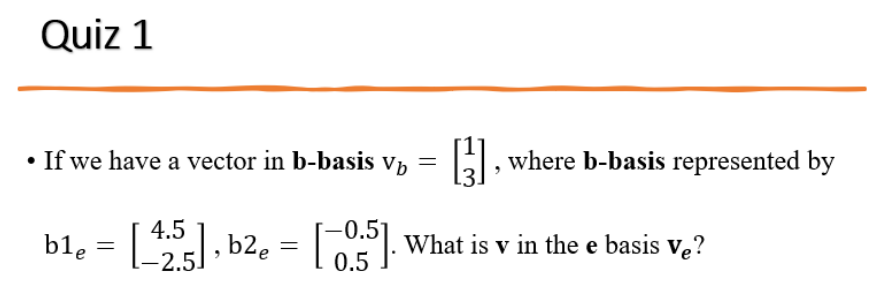

In [ ]:
vb = np.array([[1], [3]])

b1e = np.array([[4.5], [-2.5]])
b2e = np.array([[-0.5], [0.5]])

b = np.hstack((b1e, b2e))
ve = np.dot(b, vb)

print("ve = \n", ve)

ve = 
 [[ 3.]
 [-1.]]


# Quiz 2
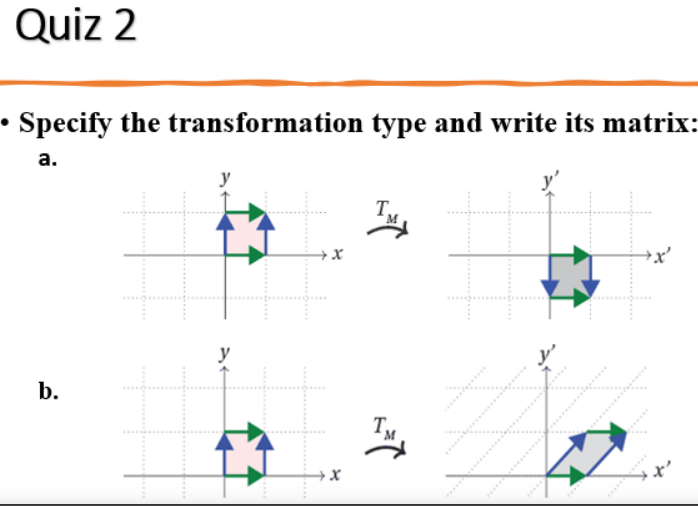

In [ ]:
# a
a_matrix = np.array([[-1,0],[0,1]])
print("a is reflection, Its MatriX is \n", a_matrix)

a is reflection, Its MatriX is 
 [[-1  0]
 [ 0  1]]


In [ ]:
# b
b_matrix = np.array([[0,-1],[1,0]])
print("b is rotation, Its MatriX is \n", b_matrix)

b is rotation, Its MatriX is 
 [[ 0 -1]
 [ 1  0]]


# Quiz 3
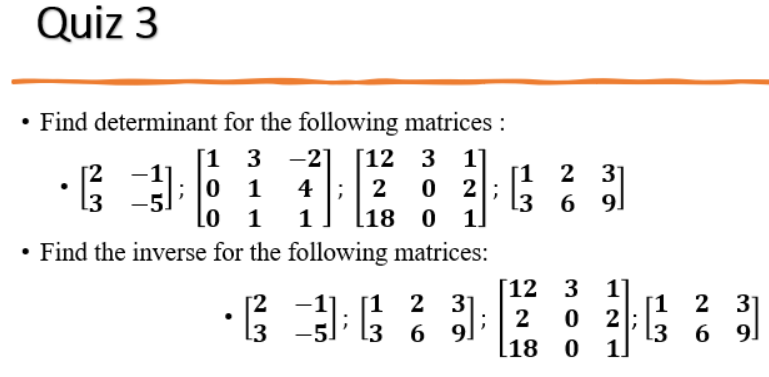![image-4.png](attachment:image-4.png)

In [ ]:
m1 = np.array([[2, -1], [3, -5]])
det1 = np.linalg.det(m1)

print("Determinant of matrix1: \n", det1)

Determinant of matrix1: 
 -6.999999999999999


In [ ]:
m2 = np.array([[1, 3, -2], [0, 1, 4], [0, 1, 1]])
det2 = np.linalg.det(m2)

print("Determinant of matrix2: \n", det2)

Determinant of matrix2: 
 -3.0000000000000004


In [ ]:
m3 = np.array([[12, 3, 1], [2, 0, 2], [18, 0, 1]])
det3 = np.linalg.det(m3)

print("Determinant of matrix3:\n", det3)

Determinant of matrix3:
 102.00000000000004


In [ ]:
m4 = np.array([[1, 2, 3], [3, 6, 9]])

try:
  det4 = np.linalg.det(m4)
  print("Determinant of matrix4: \n", det4)
except np.linalg.LinAlgError:
  print("Matrix 4 can't have determinant")

Matrix 4 can't have determinant


In [ ]:
m1 = np.array([[2, -1], [3, -5]])
try:
  m1_inv = np.linalg.inv(m1)
  print("Inverse of matrix1:\n", m1_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

Inverse of matrix1:
 [[ 0.71428571 -0.14285714]
 [ 0.42857143 -0.28571429]]


In [ ]:
m2 = np.array([[1, 2, 3], [3, 6, 9]])
try:
  m2_inv = np.linalg.inv(m2)
  print("Inverse of matrix1:\n", m2_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

Inverse does not exist


In [ ]:
m3 = np.array([[12, 3, 1], [2, 0, 2], [18, 0, 1]])
try:
  m3_inv = np.linalg.inv(m3)
  print("Inverse of matrix1:\n", m3_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

Inverse of matrix1:
 [[ 0.         -0.02941176  0.05882353]
 [ 0.33333333 -0.05882353 -0.21568627]
 [ 0.          0.52941176 -0.05882353]]


In [ ]:
# Matrix 4 is the same as matrix 2

# Homework 1
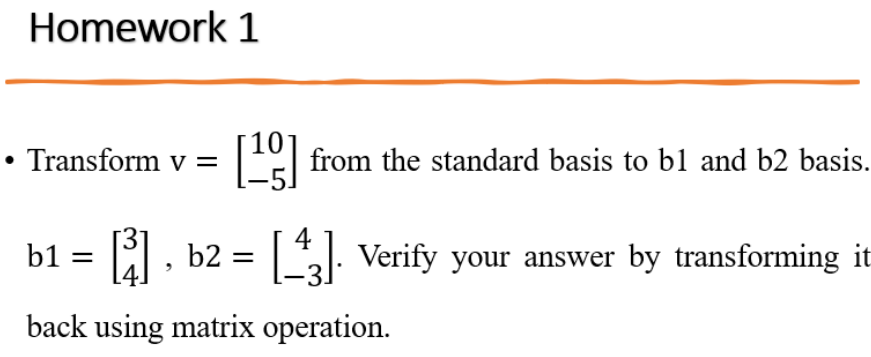

In [ ]:
import numpy as np

In [ ]:
v = np.array([[10], [-5]])

b1 = np.array([[3], [4]])
b2 = np.array([[4], [-3]])

b_T = np.array([b1, b2]).T
new_V = np.linalg.inv(b_T) @ v
original_V = b_T @ new_V

print("V(b1, b2):", new_V)
print("V Transformed back:", original_V)

V(b1, b2): [[[0.4]
  [2.2]]]
V Transformed back: [[[10.]
  [-5.]]]


# Homework 2
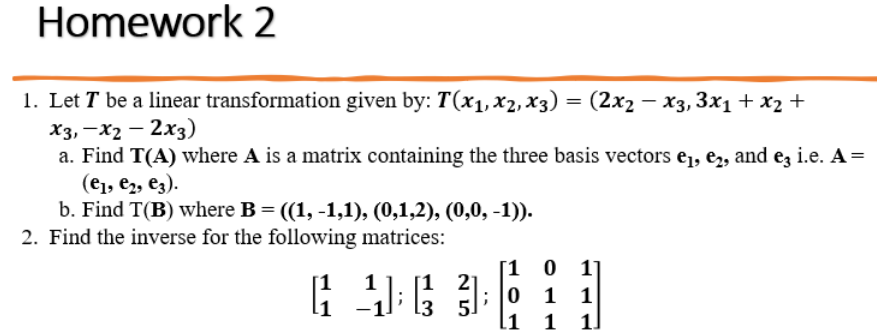

In [ ]:
def transformation(x1, x2, x3):
    t1 = 2 * x2 - x3
    t2 = 3 * x1 + x2 + x3
    t3 = -x2 - 2 * x3
    return np.array([t1, t2, t3])

e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

T_e1 = transformation(*e1)
T_e2 = transformation(*e2)
T_e3 = transformation(*e3)

T_A = np.column_stack((T_e1, T_e2, T_e3))
print("T(A):\n", T_A)

B = np.array([[1, -1, 1], [0, 1, 2], [0, 0, -1]])
T_B = np.column_stack([transformation(*B[:, i]) for i in range(B.shape[1])])
print("\nT(B): \n", T_B)

T(A):
 [[ 0  2 -1]
 [ 3  1  1]
 [ 0 -1 -2]]

T(B): 
 [[ 0  2  5]
 [ 3 -2  4]
 [ 0 -1  0]]


In [ ]:
#Find the inverse of the matrices
m1 = np.array([[1, 1], [1, -1]])
m2 = np.array([[1, 2], [3, 5]])
m3 = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 1]])

try:
  m1_inv = np.linalg.inv(m1)
  print("Inverse of matrix 1:\n", m1_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

try:
  m2_inv = np.linalg.inv(m2)
  print("Inverse of matrix 2:\n", m2_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

try:
  m3_inv = np.linalg.inv(m3)
  print("Inverse of matrix 3:\n", m3_inv)
except np.linalg.LinAlgError:
  print("Inverse does not exist")

Inverse of matrix 1:
 [[ 0.5  0.5]
 [ 0.5 -0.5]]
Inverse of matrix 2:
 [[-5.  2.]
 [ 3. -1.]]
Inverse of matrix 3:
 [[ 0. -1.  1.]
 [-1.  0.  1.]
 [ 1.  1. -1.]]


# Homework 3
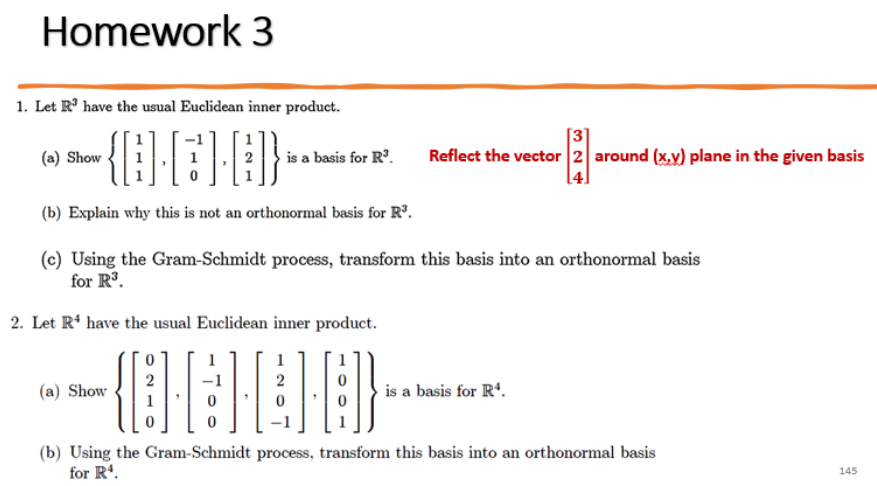

In [ ]:
# 1
A = np.array([
    [1, -1, 1],
    [1, 0, 2],
    [1, 1, 1]
])

In [ ]:
# a) A is a basis for R
rank_A = np.linalg.matrix_rank(A)

if rank_A == A.shape[1]:
  print("A is a basis for R.")
  print("Rank of A:", rank_A)
else:
  print("A is not a basis for R.")

A is a basis for R.
Rank of A: 3


In [ ]:
# b) Why A is not orthonormal basis for R
v1 = A[:, 0]
v2 = A[:, 1]
v3 = A[:, 2]

dot_product_v1_v2 = np.dot(v1, v2)
dot_product_v1_v3 = np.dot(v1, v3)
dot_product_v2_v3 = np.dot(v2, v3)

if ((dot_product_v1_v2 == 0) and (dot_product_v1_v3 == 0) and (dot_product_v2_v3 == 0)):
  print("A is orthonormal basis for R")
else:
  print("A is not orthonormal basis for R")

A is not orthonormal basis for R


In [ ]:
# c) gram_schmidt
def gram_schmidt(vectors):
    orthogonal = []
    for v in vectors.T:
        w = v - sum(np.dot(v, u) * u for u in orthogonal)
        orthogonal.append(w / np.linalg.norm(w))
    return np.array(orthogonal).T

orthonormal_basis = gram_schmidt(A)
print("Orthonormal basis:")
print(orthonormal_basis)

Orthonormal basis:
[[ 0.57735027 -0.70710678 -0.40824829]
 [ 0.57735027  0.          0.81649658]
 [ 0.57735027  0.70710678 -0.40824829]]


In [ ]:
# Reflect the vector [3, 2, 4] around the (x, y)-plane
v = np.array([3, 2, 4])
v_reflected = np.array([v[0], v[1], -v[2]])
print("Vector [3, 2, 4] reflected around (x, y)-plane:")
print(v_reflected)

Vector [3, 2, 4] reflected around (x, y)-plane:
[ 3  2 -4]


In [ ]:
# 2:
B = np.array([
    [0, 1, 1, 2],
    [2, 1, 2, 0],
    [1, 0, 0, -1],
    [0, 0, -1, 1]
])

In [ ]:
# (a) Check if the vectors form a basis
rank_B = np.linalg.matrix_rank(B)

if rank_B == B.shape[1]:
    print("The vectors form a basis.")
else:
    print("The vectors do not form a basis.")

The vectors form a basis.


In [ ]:
# (b) Gram-Schmidt process for R⁴
def gram_schmidt(vectors):
    orthogonal = []
    for v in vectors.T:
        w = v - sum(np.dot(v, u) * u for u in orthogonal)
        orthogonal.append(w / np.linalg.norm(w))
    return np.array(orthogonal).T

orthonormal_basis = gram_schmidt(B)
print("Orthonormal basis:")
print(orthonormal_basis)

Orthonormal basis:
[[ 0.          0.91287093 -0.15430335 -0.37796447]
 [ 0.89442719  0.18257419  0.15430335  0.37796447]
 [ 0.4472136  -0.36514837 -0.3086067  -0.75592895]
 [ 0.          0.         -0.9258201   0.37796447]]
